<a href="https://colab.research.google.com/github/my-quach/R-AI/blob/main/2_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 7.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
heart_rate = ctrl.Antecedent(np.arange(0, 111, 1), 'heart_rate')
blood_pressure = ctrl.Antecedent(np.arange(0, 151, 1), 'blood_pressure')
body_temperature = ctrl.Antecedent(np.arange(0, 45, 0.5), 'body_temperature')
oxygen_saturation = ctrl.Antecedent(np.arange(0, 101, 1), 'oxygen_saturation')
blood_sugar = ctrl.Antecedent(np.arange(0, 191, 1), 'blood_sugar')
medicine = ctrl.Consequent(np.arange(0, 3.1, 0.1), 'medicine')
infusion = ctrl.Consequent(np.arange(0, 3.1, 0.1), 'infusion')
oxy = ctrl.Consequent(np.arange(0, 3.1, 0.1), 'oxy')
heart_rate['low'] = fuzz.trimf(heart_rate.universe, [0, 0, 60])
heart_rate['normal'] = fuzz.trimf(heart_rate.universe, [59, 60, 101])
heart_rate['high'] = fuzz.trimf(heart_rate.universe, [100, 110, 110])
blood_pressure['low'] = fuzz.trimf(blood_pressure.universe, [0, 0, 90])
blood_pressure['normal'] = fuzz.trimf(blood_pressure.universe, [89, 100, 120])
blood_pressure['high'] = fuzz.trimf(blood_pressure.universe, [140, 150, 150])
body_temperature['low'] = fuzz.trimf(body_temperature.universe, [0, 0, 36])
body_temperature['normal'] = fuzz.trimf(body_temperature.universe, [35, 36, 38])
body_temperature['high'] = fuzz.trimf(body_temperature.universe, [38, 45, 45])
oxygen_saturation['low'] = fuzz.trimf(oxygen_saturation.universe, [0, 0, 90])
oxygen_saturation['normal'] = fuzz.trimf(oxygen_saturation.universe, [89, 90, 100])
blood_sugar['low'] = fuzz.trimf(blood_sugar.universe, [0, 0, 70])
blood_sugar['normal'] = fuzz.trimf(blood_sugar.universe, [69, 100, 140])
blood_sugar['high'] = fuzz.trimf(blood_sugar.universe, [180, 190, 190])
medicine['D'] = fuzz.trimf(medicine.universe, [0, 0, 1])
medicine['M'] = fuzz.trimf(medicine.universe, [0.9, 1, 2])
medicine['I'] = fuzz.trimf(medicine.universe, [1.9, 2, 3])
infusion['R'] = fuzz.trimf(infusion.universe, [0, 0, 1])
infusion['M'] = fuzz.trimf(infusion.universe, [0.9, 1, 2])
infusion['I'] = fuzz.trimf(infusion.universe, [1.9, 2, 3])
oxy['R'] = fuzz.trimf(oxy.universe, [0, 0, 1])
oxy['M'] = fuzz.trimf(oxy.universe, [0.9, 1, 2])
oxy['I'] = fuzz.trimf(oxy.universe, [1.9, 2, 3])



rule1 = ctrl.Rule(heart_rate['low'] & blood_pressure['low'], (infusion['I'], medicine['I']))
rule2 = ctrl.Rule(heart_rate['high'] & blood_pressure['high'], medicine['D'])
rule3 = ctrl.Rule(heart_rate['normal'] & blood_pressure['normal'], medicine['M'])

rule4 = ctrl.Rule(body_temperature['high'] & oxygen_saturation['low'], (oxy['I'], medicine['I']))
rule5 = ctrl.Rule(body_temperature['normal'] & oxygen_saturation['normal'], oxy['M'])
rule6 = ctrl.Rule(body_temperature['low'] & oxygen_saturation['low'], (oxy['I'], infusion['M']))

rule7 = ctrl.Rule(blood_sugar['high'], medicine['I'])
rule8 = ctrl.Rule(blood_sugar['normal'], medicine['M'])
rule9 = ctrl.Rule(blood_sugar['low'], medicine['D'])

rule10 = ctrl.Rule(blood_pressure['high'] & blood_sugar['high'] & heart_rate['high'], medicine['D'])
rule11 = ctrl.Rule(blood_pressure['low'] & oxygen_saturation['low'] & heart_rate['low'], (infusion['I'], medicine['I'], oxy['I']))
rule12 = ctrl.Rule(body_temperature['high'] & blood_pressure['high'] & oxygen_saturation['normal'], (medicine['I'], oxy['I']))

1.558870894758607
2.413636363636363
2.445018726591759


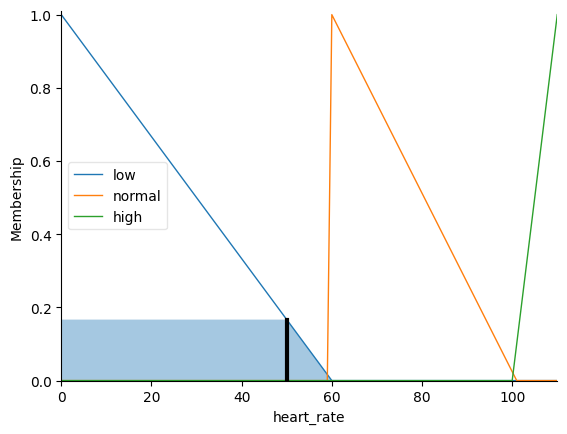

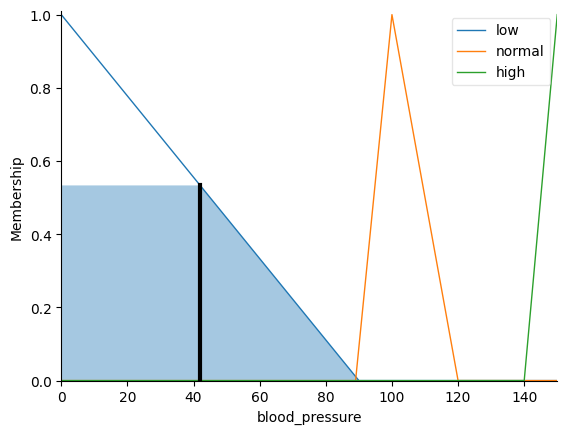

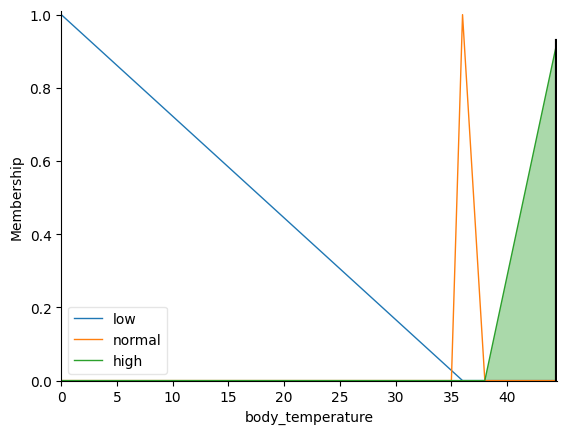

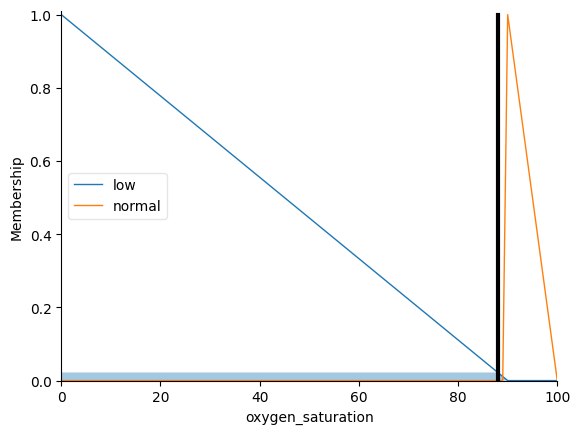

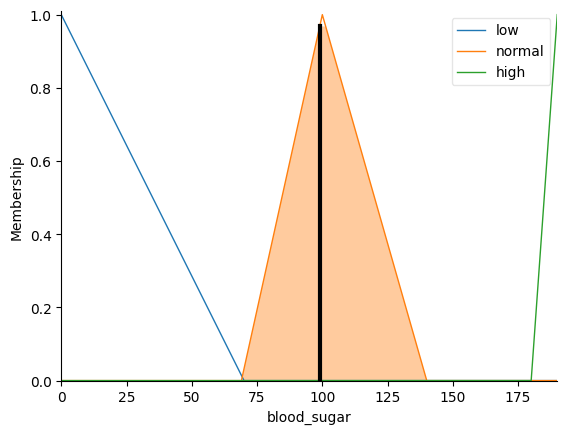

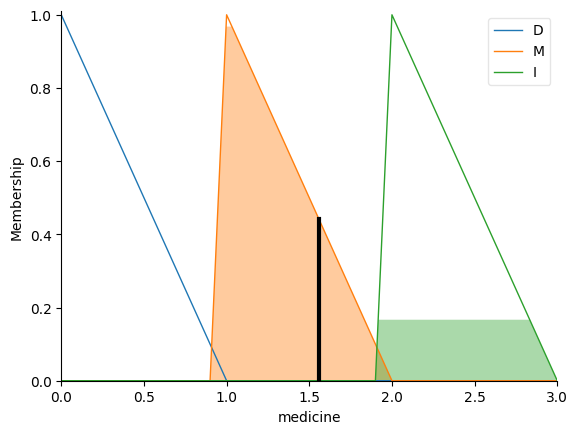

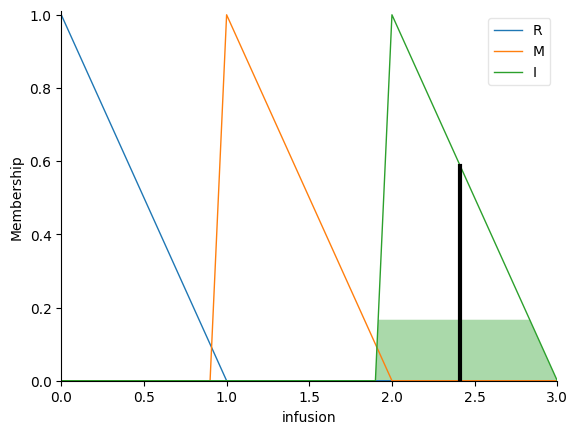

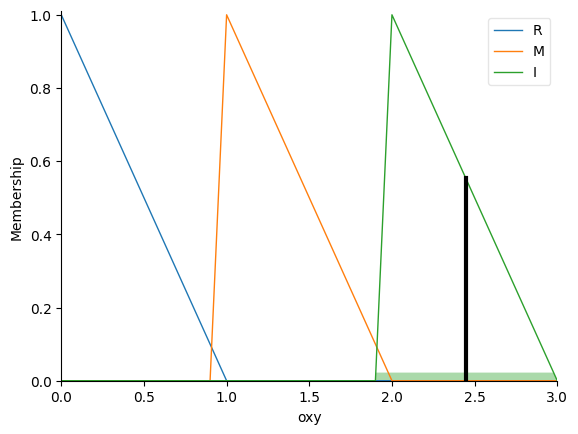

In [3]:
fuzzy_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
medicine_system = ctrl.ControlSystemSimulation(fuzzy_system)
medicine_system.input['heart_rate'] = 50
medicine_system.input['blood_pressure'] = 42
medicine_system.input['body_temperature'] = 77
medicine_system.input['oxygen_saturation'] = 88
medicine_system.input['blood_sugar'] = 99
medicine_system.compute()
print(medicine_system.output['medicine'])
print(medicine_system.output['infusion'])
print(medicine_system.output['oxy'])
heart_rate.view(sim=medicine_system)
blood_pressure.view(sim=medicine_system)
body_temperature.view(sim=medicine_system)
oxygen_saturation.view(sim=medicine_system)
blood_sugar.view(sim=medicine_system)
medicine.view(sim=medicine_system)
infusion.view(sim=medicine_system)
oxy.view(sim=medicine_system)